# Classification
**Will this Passholder Renew for Next Season?** <br>
Built and evaluated logistic regression and random forest models in Python to predict passholder renewal behavior using demographic, behavioral, and engagement data. Applied data cleaning, feature engineering, model interpretation, and performance evaluation to generate actionable insights for targeted marketing and retention strategy, complemented by an interactive Tableau KPI dashboard.

## Part I: Logistic Regression Model

In [115]:
# Import necessary functions to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [116]:
passholder = pd.read_csv("data/lobsterland_passholders_dataset_25.csv")

In [117]:
passholder.head()

,Age,Previous_Visits,Total_Spend_2024,Feedback_Score,Gold_Zone_Visits,Email_Engagement_Score,Distance_From_Park_Miles,Home_State,Preferred_Attraction,Referral_Source,Dining_Plan,Renewed_Pass
0,59.000000,3.000000,394.780000,4.606232,4.000000,44.200000,1.900000,VT,Thrill,Social Media,Upgraded,0
1,27.846318,1.064843,172.541334,2.102264,2.000819,37.103840,21.709631,NH,Other,Ad/Other,NaN,1
2,18.000000,5.926144,151.731274,3.365074,1.019084,61.827722,21.892411,VT,Entertainment,Social Media,Upgraded,1
3,25.000000,12.000000,251.300000,3.458663,1.000000,41.800000,6.600000,NY,Other,Friend,Upgraded,0
4,66.206178,4.038141,197.686695,2.985864,3.955755,61.174332,29.981959,NJ,Entertainment,Ad/Other,Upgraded,1


In [118]:
passholder.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   Previous_Visits           1000 non-null   float64
 2   Total_Spend_2024          1000 non-null   float64
 3   Feedback_Score            1000 non-null   float64
 4   Gold_Zone_Visits          1000 non-null   float64
 5   Email_Engagement_Score    1000 non-null   float64
 6   Distance_From_Park_Miles  1000 non-null   float64
 7   Home_State                1000 non-null   str    
 8   Preferred_Attraction      1000 non-null   str    
 9   Referral_Source           1000 non-null   str    
 10  Dining_Plan               667 non-null    str    
 11  Renewed_Pass              1000 non-null   int64  
dtypes: float64(7), int64(1), str(4)
memory usage: 93.9 KB


- **Numerical Variables:** Age, Previous_Visits, Total_Spend_2024, Feedback_Score, Gold_Zone_Visits, Email_Engagement_Score, Distance_From_Park_Miles

- **Categorical Variables:** Home_State, Preferred_Attraction, Referral_Source, Dining_Plan

- **Renewed_Pass:** binary target (0/1 or bool); treat as outcome, not a predictor.

In [119]:
# Convert the variables to the categorical data type
passholder[['Home_State', 'Preferred_Attraction', 'Referral_Source', 'Dining_Plan']] = passholder[['Home_State', 'Preferred_Attraction', 'Referral_Source', 'Dining_Plan']].astype('category')

# Convert the Renewed_Pass to bool
passholder[['Renewed_Pass']] = passholder[['Renewed_Pass']].astype('bool')

# Double-check to see if all the variables return to the correct type
passholder.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1000 non-null   float64 
 1   Previous_Visits           1000 non-null   float64 
 2   Total_Spend_2024          1000 non-null   float64 
 3   Feedback_Score            1000 non-null   float64 
 4   Gold_Zone_Visits          1000 non-null   float64 
 5   Email_Engagement_Score    1000 non-null   float64 
 6   Distance_From_Park_Miles  1000 non-null   float64 
 7   Home_State                1000 non-null   category
 8   Preferred_Attraction      1000 non-null   category
 9   Referral_Source           1000 non-null   category
 10  Dining_Plan               667 non-null    category
 11  Renewed_Pass              1000 non-null   bool    
dtypes: bool(1), category(4), float64(7)
memory usage: 59.9 KB


In [120]:
passholder['Renewed_Pass'].value_counts()

Renewed_Pass
True     580
False    420
Name: count, dtype: int64

By using the value_counts() function, I found that out of 1,000 passholders, 580 renewed their passes (True) and 420 did not (False). This means that about 58% of customers chose to renew, while 42% did not. Understanding this distribution helps LobsterLand’s management identify the current renewal rate and focus on strategies to increase it—for example, by attracting non-renewers with targeted promotions or loyalty programs.

#### Missing values

In [121]:
passholder.isnull().sum()

Age                           0
Previous_Visits               0
Total_Spend_2024              0
Feedback_Score                0
Gold_Zone_Visits              0
Email_Engagement_Score        0
Distance_From_Park_Miles      0
Home_State                    0
Preferred_Attraction          0
Referral_Source               0
Dining_Plan                 333
Renewed_Pass                  0
dtype: int64

In [122]:
passholder['Dining_Plan'].head()

0    Upgraded
1         NaN
2    Upgraded
3    Upgraded
4    Upgraded
Name: Dining_Plan, dtype: category
Categories (1, str): ['Upgraded']

In [123]:
# Add category 'None' to 'Dining_Plan' variable then fill any NaN values with 'None'
passholder['Dining_Plan'] = passholder['Dining_Plan'].cat.add_categories(['None']).fillna('None')

In [124]:
# Double-check to see if 'Dining_Plan' variable still has any missing values
passholder['Dining_Plan'].isnull().sum()
passholder['Dining_Plan'].unique

<bound method Series.unique of 0      Upgraded
1          None
2      Upgraded
3      Upgraded
4      Upgraded
         ...   
995    Upgraded
996    Upgraded
997    Upgraded
998    Upgraded
999    Upgraded
Name: Dining_Plan, Length: 1000, dtype: category
Categories (2, str): ['Upgraded', 'None']>

According to the dataset description, the Dining_Plan variable indicates whether a passholder purchased a Lobster Land food plan, with two possible options: 'None' and 'Upgraded', where Upgraded includes both the Standard and Premium tiers. There are 333 missing values in this variable, which likely represent passholders who did not purchase any dining plan. For consistency, I replaced all missing values with 'None' to accurately reflect this behavior and ensure the data remains complete for analysis.

#### Impossible values

In [125]:
passholder.describe()

,Age,Previous_Visits,Total_Spend_2024,Feedback_Score,Gold_Zone_Visits,Email_Engagement_Score,Distance_From_Park_Miles
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,45.843471,4.739685,211.420490,3.231483,2.045040,50.055373,30.708474
std,16.278317,2.291030,105.815989,0.992790,1.411507,19.941021,17.108942
min,18.000000,0.000000,-39.950000,1.000000,0.000000,-8.100000,0.100000
25%,33.000000,3.000000,142.775364,2.585852,1.000000,35.975548,18.300000
50%,46.278713,5.000000,199.942199,3.306673,2.000000,50.450000,29.837614
75%,61.000000,6.005339,274.070000,3.826473,3.000000,62.783218,43.797075
max,74.000000,12.000000,559.830000,5.000000,8.000000,108.300000,87.100000


#### Are there any values in this dataset that appear to be impossible? If so, why? If not, why not?

In [126]:
# View rows with negative Total_Spend_2024 and Email_Engagement_Score outside of range 0-100
passholder[(passholder['Total_Spend_2024'] < 0)]

,Age,Previous_Visits,Total_Spend_2024,Feedback_Score,Gold_Zone_Visits,Email_Engagement_Score,Distance_From_Park_Miles,Home_State,Preferred_Attraction,Referral_Source,Dining_Plan,Renewed_Pass
228,34.632594,2.948977,-1.000297,3.072944,0.965401,53.158994,53.764673,ME,Other,Ad/Other,Upgraded,True
280,34.092198,2.986994,-0.508581,3.033482,0.977585,52.641486,53.059526,ME,Other,Ad/Other,Upgraded,False
465,54.000000,6.000000,-39.950000,3.142010,4.000000,58.900000,10.300000,NY,Other,Ad/Other,Upgraded,True
477,34.430205,2.951587,-0.751035,3.027981,0.996431,51.767003,52.981610,ME,Other,Ad/Other,Upgraded,True
485,33.764976,2.934015,-1.852003,3.043365,1.004973,53.342196,53.162699,ME,Other,Ad/Other,Upgraded,True
493,26.000000,5.000000,-2.230000,3.555003,2.000000,55.600000,27.800000,VT,Thrill,Ad/Other,Upgraded,True
499,33.327308,2.984666,-1.439116,3.037064,0.967710,53.574152,53.156368,ME,Other,Ad/Other,Upgraded,False
573,42.000000,4.000000,-23.910000,3.239964,6.000000,66.800000,32.500000,MA,Other,Social Media,Upgraded,True
750,33.715105,3.037335,-3.514091,3.059007,1.022880,53.124907,53.273690,ME,Other,Ad/Other,Upgraded,True
761,52.000000,4.000000,-3.180000,3.991413,4.000000,66.700000,51.200000,NJ,Entertainment,Ad/Other,Upgraded,False


In [127]:
# View rows with Email_Engagement_Score outside of range 0-100
passholder[(passholder['Email_Engagement_Score'] < 0) | (passholder['Email_Engagement_Score'] > 100)]

,Age,Previous_Visits,Total_Spend_2024,Feedback_Score,Gold_Zone_Visits,Email_Engagement_Score,Distance_From_Park_Miles,Home_State,Preferred_Attraction,Referral_Source,Dining_Plan,Renewed_Pass
308,42.0,2.0,385.92,2.830563,1.0,102.9,9.4,MA,Other,Ad/Other,None,False
379,21.0,4.0,345.79,2.868348,1.0,-8.1,39.3,ME,Thrill,Ad/Other,None,False
418,37.0,4.0,339.49,3.264726,1.0,105.3,34.9,VT,Entertainment,Ad/Other,None,True
902,55.0,4.0,150.17,4.445888,0.0,108.3,41.9,NY,Thrill,Ad/Other,Upgraded,False


In [128]:
# Drop the negative Total_Spend_2024 value by filtering it to be greater than 0
passholder = passholder[passholder['Total_Spend_2024'] >= 0]

The negative values in Total_Spend_2024 range from –39 to –0.50, which isn’t much and could possibly represent small refunds from Lobster Land to customers. However, negative spending contradicts the variable’s definition, which means to capture the total amount spent by a passholder during the season. Even if these small negatives reflect refunds, they should be tracked separately to avoid misrepresenting overall spending behavior. Since there are only 11 negative values, accounting for less than 1.5% of the dataset, I decided to drop them to maintain a clean and accurate dataset for further analysis.

In [129]:
# Cap Email_Engagement_Score at 100 for those exceeding the 100 range
passholder['Email_Engagement_Score'] = passholder['Email_Engagement_Score'].clip(upper=100)

I capped the Email_Engagement_Score at 100 because a few users had scores slightly above that limit (102.9; 105.3; 108.3), likely due to very high engagement. All three users visited Lobster Land at least twice, showing a 100% return rate after their first visit, which is possibly influenced by follow-up emails. Clipping these minor outliers keeps the metric consistent with its defined scale while preserving meaningful behavioral signals in the data.

In [130]:
# Drop the negative Email_Engagement_Score value by filtering it to be greater than 0
passholder = passholder[passholder['Email_Engagement_Score'] >= 0]

I decided to drop the row with a negative Email_Engagement_Score because it's supposed to stay within the 0–100 range, and negative values don’t have any meaningful interpretation. Since only one row is affected, I felt removing it would keep the dataset clean without introducing bias and ensure consistent analysis.

In [131]:
# Re-check to see if the dataset contains any nan value
passholder.isnull().sum()

Age                         0
Previous_Visits             0
Total_Spend_2024            0
Feedback_Score              0
Gold_Zone_Visits            0
Email_Engagement_Score      0
Distance_From_Park_Miles    0
Home_State                  0
Preferred_Attraction        0
Referral_Source             0
Dining_Plan                 0
Renewed_Pass                0
dtype: int64

#### Examining correlations
#### Build a correlation table to examine the correlations among your numeric independent variables.

In [132]:
# Filter out numeric variables to examine the correlations
numeric_vars = passholder.select_dtypes(include=['float64', 'int64'])

# Create a correlation table with numeric variables from the dataset
corr_table = numeric_vars.corr()
print(corr_table.round(3).to_string())

                            Age  Previous_Visits  Total_Spend_2024  Feedback_Score  Gold_Zone_Visits  Email_Engagement_Score  Distance_From_Park_Miles
Age                       1.000            0.072             0.135           0.009             0.020                  -0.037                     0.100
Previous_Visits           0.072            1.000             0.054          -0.070            -0.084                  -0.071                    -0.094
Total_Spend_2024          0.135            0.054             1.000           0.046            -0.054                  -0.001                     0.065
Feedback_Score            0.009           -0.070             0.046           1.000             0.027                  -0.092                    -0.033
Gold_Zone_Visits          0.020           -0.084            -0.054           0.027             1.000                   0.023                    -0.092
Email_Engagement_Score   -0.037           -0.071            -0.001          -0.092            

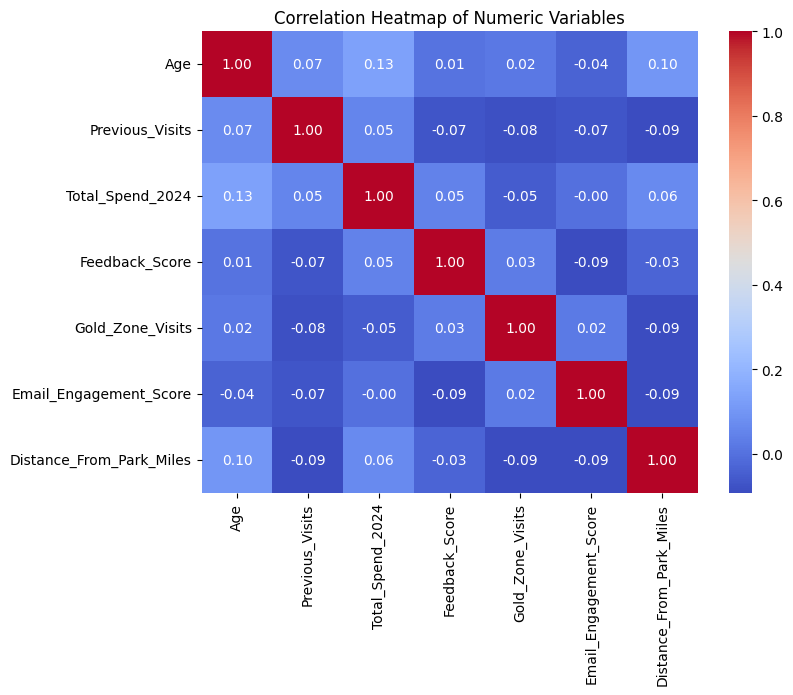

In [133]:
# Display the correlation table in heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

#### Are there any correlations here that are so high as to present a likely problem with multicollinearity?
The correlation table indicates that none of the variables are strongly related to one another, as all coefficients are well below the typical threshold for multicollinearity (r ≥ 0.8). The highest correlation, 0.135 between Age and Total_Spend_2024 indicating older renewers tend to spend more than the younger audience, is too weak to raise any concerns. Therefore, I can keep all numeric predictors for the modeling stage.

#### For any variables that need to be dummified, dummify them, being sure to drop one level as you do.

In [134]:
# Dummify all categorical variables and dropping one category per variable to avoid multicollinearity
passholder = pd.get_dummies(passholder, columns=[
    'Home_State',
    'Preferred_Attraction',
    'Referral_Source',
    'Dining_Plan'
], drop_first=True)

In [135]:
passholder.head(5)

,Age,Previous_Visits,Total_Spend_2024,Feedback_Score,Gold_Zone_Visits,Email_Engagement_Score,Distance_From_Park_Miles,Renewed_Pass,Home_State_ME,Home_State_NH,Home_State_NJ,Home_State_NY,Home_State_VT,Preferred_Attraction_Other,Preferred_Attraction_Thrill,Referral_Source_Friend,Referral_Source_Social Media,Dining_Plan_None
0,59.000000,3.000000,394.780000,4.606232,4.000000,44.200000,1.900000,False,False,False,False,False,True,False,True,False,True,False
1,27.846318,1.064843,172.541334,2.102264,2.000819,37.103840,21.709631,True,False,True,False,False,False,True,False,False,False,True
2,18.000000,5.926144,151.731274,3.365074,1.019084,61.827722,21.892411,True,False,False,False,False,True,False,False,False,True,False
3,25.000000,12.000000,251.300000,3.458663,1.000000,41.800000,6.600000,False,False,False,False,True,False,True,False,True,False,False
4,66.206178,4.038141,197.686695,2.985864,3.955755,61.174332,29.981959,True,False,False,True,False,False,False,False,False,False,False


After dummifying the categorical variables, I set the following reference levels: Home_State – MA, Preferred_Attraction – Entertainment, Referral_Source – Ad/Other, and Dining_Plan – Upgraded. These serve as the baseline categories against which other levels are compared in the model. The Renewed_Pass variable is already numeric and binary, so it does not require dummification.

#### Create a data partition. Assign 40% of your rows to your test set, and 60% to your training set.

In [136]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(passholder, test_size=0.4, random_state=156)
print(f"Training set size: {len(train_df)} rows")
print(f"Test set size: {len(test_df)} rows")

Training set size: 592 rows
Test set size: 396 rows


For the random seed, I chose 156 because it matches the last three digits of my BUID. Using a personal but simple reference like this helps ensure consistency while keeping the seed easy to remember. It also guarantees that my results are reproducible if I need to rerun the analysis.

#### Compare the mean values of the variables in the dataset after grouping by Renewed_Pass.

In [137]:
# Change Renewed_Pass to Class 0/1
passholder['Renewed_Pass'] = passholder['Renewed_Pass'].astype(int)
passholder.groupby('Renewed_Pass').mean(numeric_only=True)

,Age,Previous_Visits,Total_Spend_2024,Feedback_Score,Gold_Zone_Visits,Email_Engagement_Score,Distance_From_Park_Miles,Home_State_ME,Home_State_NH,Home_State_NJ,Home_State_NY,Home_State_VT,Preferred_Attraction_Other,Preferred_Attraction_Thrill,Referral_Source_Friend,Referral_Source_Social Media,Dining_Plan_None
Renewed_Pass,,,,,,,,,,,,,,,,,
0,47.381249,4.672605,217.665995,3.176391,2.014964,51.457782,30.060697,0.110577,0.127404,0.165865,0.201923,0.290865,0.454327,0.348558,0.194712,0.211538,0.358173
1,44.929268,4.811163,210.848800,3.272654,2.067988,48.989534,30.889094,0.159091,0.173077,0.125874,0.178322,0.208042,0.477273,0.325175,0.145105,0.225524,0.319930


#### From the results you see here, choose any THREE independent variables from the dataset, and speculate about their likely impact on the result – do you think this variable will be strongly impactful?

I chose these three variables: **Email_Engagement_Score, Total_Spend_2024,** and **Dining_Plan_None** because they each capture different aspects of customer behavior that could influence renewal decisions. **Email_Engagement_Score** reflects digital interaction and communication responsiveness, **Total_Spend_2024** shows spending patterns for each visitors, and **Dining_Plan_None** indicates spending habits and overall commitment to the park experience. Together, these variables provide a balanced mix of behavioral, experiential, and transactional factors that could help explain differences between renewers and non-renewers.

- **Email_Engagement_Score:** Non-renewers have a slightly higher average score (51.45) than renewers (48.98). This suggests that email engagement may not directly drive renewal, or that more engaged users are more critical.
- **Total_Spend_2024:** Non-renewers spent slightly more on average in 2024 (\\$217.67) than renewers (\\$210.85), which is unexpected if we assume higher spend reflects stronger loyalty. This could suggest that one-time high spenders don’t necessarily return, or that renewers are more consistent but spend less per season. 
- **Dining_Plan_None:** Non-renewers are more likely to have no dining plan (35.81%) compared to renewers (31.99%), suggesting that opting out of the food plan may correlate with lower overall commitment or value perception.

### Iteration #1
#### Build a logistic regression model using statsmodels, with the outcome variable ‘Renewed_Pass’.

In [138]:
passholder.head()

,Age,Previous_Visits,Total_Spend_2024,Feedback_Score,Gold_Zone_Visits,Email_Engagement_Score,Distance_From_Park_Miles,Renewed_Pass,Home_State_ME,Home_State_NH,Home_State_NJ,Home_State_NY,Home_State_VT,Preferred_Attraction_Other,Preferred_Attraction_Thrill,Referral_Source_Friend,Referral_Source_Social Media,Dining_Plan_None
0,59.000000,3.000000,394.780000,4.606232,4.000000,44.200000,1.900000,0,False,False,False,False,True,False,True,False,True,False
1,27.846318,1.064843,172.541334,2.102264,2.000819,37.103840,21.709631,1,False,True,False,False,False,True,False,False,False,True
2,18.000000,5.926144,151.731274,3.365074,1.019084,61.827722,21.892411,1,False,False,False,False,True,False,False,False,True,False
3,25.000000,12.000000,251.300000,3.458663,1.000000,41.800000,6.600000,0,False,False,False,True,False,True,False,True,False,False
4,66.206178,4.038141,197.686695,2.985864,3.955755,61.174332,29.981959,1,False,False,True,False,False,False,False,False,False,False


In [139]:
print(train_df.dtypes)

Age                             float64
Previous_Visits                 float64
Total_Spend_2024                float64
Feedback_Score                  float64
Gold_Zone_Visits                float64
Email_Engagement_Score          float64
Distance_From_Park_Miles        float64
Renewed_Pass                       bool
Home_State_ME                      bool
Home_State_NH                      bool
Home_State_NJ                      bool
Home_State_NY                      bool
Home_State_VT                      bool
Preferred_Attraction_Other         bool
Preferred_Attraction_Thrill        bool
Referral_Source_Friend             bool
Referral_Source_Social Media       bool
Dining_Plan_None                   bool
dtype: object


In [140]:
# Convert all bool variables to numeric form
train_df = train_df.astype({col: int for col in train_df.select_dtypes('bool').columns})

In [141]:
import statsmodels.api as sm

X_train = train_df.drop(columns=['Renewed_Pass'])
y_train = train_df['Renewed_Pass']

X_train = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train)
passholder_model = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.647964
         Iterations 5


#### Show the summary of your model with log_reg.summary().

In [142]:
passholder_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Renewed_Pass   No. Observations:                  592
Model:                          Logit   Df Residuals:                      574
Method:                           MLE   Df Model:                           17
Date:                Wed, 04 Feb 2026   Pseudo R-squ.:                 0.04379
Time:                        20:03:21   Log-Likelihood:                -383.59
converged:                       True   LL-Null:                       -401.16
Covariance Type:            nonrobust   LLR p-value:                  0.005978
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.7841      0.694      1.130      0.258      -0.576       2.144
Age                             -0.0079      0.005     -1.462      0.144      -0.019       0.003
Previous_Visits                  0.0647      0.041      1.568      0.117      -0.016       0.146
Total_Spend_2024                -0.0004      0.001     -0.411      0.681      -0.002       0.001
Feedback_Score                   0.1498      0.093      1.618      0.106      -0.032       0.331
Gold_Zone_Visits                 0.0494      0.064      0.769      0.442      -0.076       0.175
Email_Engagement_Score        4.514e-05      0.005      0.010      0.992      -0.009       0.009
Distance_From_Park_Miles         0.0031      0.005      0.559      0.576      -0.008       0.014
Home_State_ME                   -0.2888      0.357     -0.810      0.418      -0.988       0.410
Home_State_NH                   -0.1766      0.364     -0.486      0.627      -0.889       0.536
Home_State_NJ                   -1.1599      0.349     -3.322      0.001      -1.844      -0.476
Home_State_NY                   -0.6981      0.329     -2.122      0.034      -1.343      -0.053
Home_State_VT                   -1.0633      0.322     -3.299      0.001      -1.695      -0.432
Preferred_Attraction_Other      -0.2398      0.239     -1.004      0.315      -0.708       0.228
Preferred_Attraction_Thrill     -0.5000      0.251     -1.988      0.047      -0.993      -0.007
Referral_Source_Friend          -0.3234      0.246     -1.313      0.189      -0.806       0.159
Referral_Source_Social Media    -0.0085      0.221     -0.039      0.969      -0.442       0.425
Dining_Plan_None                 0.0198      0.186      0.106      0.916      -0.346       0.385
================================================================================================
"""

#### Which of your numeric variables here are showing high p-values?
A p-value greater than 0.05 means the variable is not statistically significant, suggesting that any observed effect could easily be due to random chance rather than a real relationship with renewal behavior. All the numeric variables display relatively high p-values, suggesting that none are statistically significant predictors of renewal at the 0.05 level. Age (p = 0.144), Previous_Visits (p = 0.117), Feedback_Score (p = 0.106), and Distance_From_Park_Miles (p = 0.576) show weak associations with renewal status, while Total_Spend_2024 (p = 0.681) and Email_Engagement_Score (p = 0.992) are particularly uninformative. This indicates that these factors do not have a meaningful impact on predicting renewal behavior.

#### For your categorical variables, which ones are showing high p-values for ALL of the levels in the model summary?
For the categorical variables, both Referral_Source and Dining_Plan have high p-values across all levels: Referral_Source_Friend (p = 0.189), Referral_Source_Social Media (p = 0.969), and Dining_Plan_None (p = 0.916) suggesting they are not statistically significant overall. 

On the other hand, several Home_State variables are significant, including NJ (p = 0.001), NY (p = 0.034), and VT (p = 0.001), indicating that passholder's location may impact one's renewal behavior. Similarly, Preferred_Attraction_Thrill is significant (p = 0.047), implying that customers who prefer thrill rides are less likely to renew compared to those who prefer entertainment attractions. Overall, these results suggest that geographic and experiential factors have stronger predictive power than engagement or spending-related measures.

### Iteration #2
#### Build yet another model, use training set only.

For the new model, I’m keeping only the variables that showed a meaningful relationship with renewal in the previous analysis. This includes Home_State (specifically NJ, NY, and VT) and Preferred_Attraction_Thrill, since these had p-values below 0.05 and appear to influence whether a passholder renews.

All other variables are being dropped because they were not statistically significant. This includes all the numeric variables, such as Age, Previous_Visits, Total_Spend_2024, Feedback_Score, Gold_Zone_Visits and Email_Engagement_Score, as well as categorical variables: Referral_Source and Dining_Plan. Though Home_State and Preferred_Attraction have some insignificant variables, these sections still contain meaningful variables, so I will keep all of them for consistent result.

In [143]:
# Drop all insignificant variables for the 2nd model including all numeric variables and some categorical variables
drop_vars = [
    'Age', 'Previous_Visits', 'Total_Spend_2024', 'Feedback_Score',
    'Gold_Zone_Visits', 'Email_Engagement_Score', 'Distance_From_Park_Miles',
    'Referral_Source_Friend', 'Referral_Source_Social Media', 'Dining_Plan_None'
]

X_train = train_df.drop(columns=['Renewed_Pass'] + drop_vars)
y_train = train_df['Renewed_Pass']

X_train = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train)
passholder_model2 = logit_model.fit()
passholder_model2.summary()

Optimization terminated successfully.
         Current function value: 0.655800
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Renewed_Pass   No. Observations:                  592
Model:                          Logit   Df Residuals:                      584
Method:                           MLE   Df Model:                            7
Date:                Wed, 04 Feb 2026   Pseudo R-squ.:                 0.03222
Time:                        20:03:21   Log-Likelihood:                -388.23
converged:                       True   LL-Null:                       -401.16
Covariance Type:            nonrobust   LLR p-value:                 0.0005348
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.2775      0.318      4.020      0.000       0.655       1.900
Home_State_ME                  -0.3568      0.347     -1.028      0.304      -1.037       0.323
Home_State_NH                  -0.1293      0.346     -0.373      0.709      -0.808       0.550
Home_State_NJ                  -1.1510      0.344     -3.343      0.001      -1.826      -0.476
Home_State_NY                  -0.7526      0.322     -2.340      0.019      -1.383      -0.122
Home_State_VT                  -1.0290      0.315     -3.267      0.001      -1.646      -0.412
Preferred_Attraction_Other     -0.2879      0.232     -1.238      0.216      -0.744       0.168
Preferred_Attraction_Thrill    -0.4526      0.245     -1.846      0.065      -0.933       0.028
===============================================================================================
"""

#### Using scikit-learn, build another version of your model, using your remaining variables.

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = passholder[['Home_State_ME','Home_State_NH','Home_State_NJ', 'Home_State_NY', 'Home_State_VT', 'Preferred_Attraction_Other', 'Preferred_Attraction_Thrill']]
y = passholder['Renewed_Pass']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=156
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train_scaled, y_train)
print(f"Intercept: {logmodel.intercept_[0]:.3f}")
print("\nCoefficient:")
for feature, coef in zip(X_train.columns, logmodel.coef_[0]):
    print(f"{feature}: {coef:.3f}")

Intercept: 0.372

Coefficient:
Home_State_ME: -0.115
Home_State_NH: -0.035
Home_State_NJ: -0.384
Home_State_NY: -0.286
Home_State_VT: -0.417
Preferred_Attraction_Other: -0.139
Preferred_Attraction_Thrill: -0.211


#### Assess the performance of your model against the test set. Build a confusion matrix, and answer the following questions about your model.

In [145]:
# Import metric functions from scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, balanced_accuracy_score

y_pred = logmodel.predict(X_test_scaled)

passholder_cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("The model's confusion matrix:\n", passholder_cm)

The model's confusion matrix:
 [[ 59 113]
 [ 69 155]]


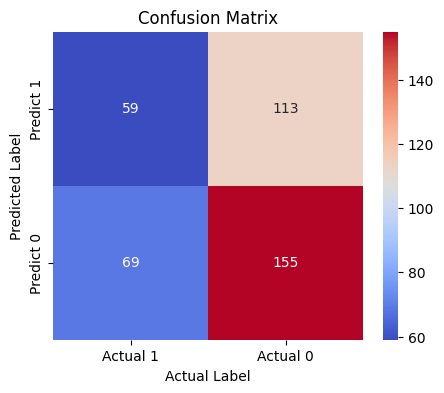

In [146]:
plt.figure(figsize=(5, 4))
sns.heatmap(passholder_cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Actual 1', 'Actual 0'],
            yticklabels=['Predict 1', 'Predict 0'])
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

The model correctly predicted 59 as non‑renewal (TN) and incorrectly predicted as 113 renewal (FP). While it correctly predicted 155 as renewal (TP) and incorrectly predicted 69 as non‑renewal (FN).

#### What is your model’s accuracy rate?

In [147]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Rate: {accuracy:.3f}")

Accuracy Rate: 0.540


#### What is your model’s sensitivity rate?

In [148]:
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity Rate: {sensitivity:.3f}")

Sensitivity Rate: 0.692


#### What is your model’s specificity rate?

In [149]:
specificity = tn / (tn + fp)
print(f"Specificity Rate: {specificity:.3f}")

Specificity Rate: 0.343


#### What is your model’s precision?

In [150]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")

Precision: 0.578


#### What is your model’s balanced accuracy?

In [151]:
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.3f}")

Balanced Accuracy: 0.517


The model shows good sensitivity (0.692), meaning it captures most renewals, but low specificity (0.343), missing many non-renewals. With overall accuracy at 51.7%, which is slightly above baseline, suggesting that it leans toward predicting renewals and struggles to distinguish non-renewals effectively.

#### What is the naive accuracy rate (baseline rate) for this dataset?

In [152]:
baseline_rate = max(y_test.mean(), 1 - y_test.mean())
print(f"Naive Accuracy Rate: {baseline_rate:.3f}")

Naive Accuracy Rate: 0.566


#### How does this compare with your model’s accuracy rate? If a classification model’s accuracy is not much better than the naive rate, can the model still be useful? If so, how?
My model achieved an accuracy of 51.7%, which is slightly lower than the naive baseline rate of 56.6%, representing the proportion of the majority class. Although it didn’t outperform a simple majority prediction, accuracy alone doesn’t capture the model’s full value. The model can still be useful if it improves metrics like sensitivity or precision, especially when correctly identifying renewals would help with targeted marketing and better allocation.

#### Compare your model’s accuracy against the training set vs. accuracy against the test set.

In [153]:
# Accuracy score for trained dataset
train_pred = logmodel.predict(X_train_scaled)
train_acc = accuracy_score(y_train, train_pred)

# Accuracy score for tested dataset
test_pred = logmodel.predict(X_test_scaled)
test_acc = accuracy_score(y_test, test_pred)
print(f"Accuracy score for training set: {train_acc:.3f}")
print(f"Accuracy score for test set: {test_acc:.3f}")

Accuracy score for training set: 0.620
Accuracy score for test set: 0.540


#### What is the purpose of comparing those two values?
Comparing the training and test accuracy helps determine how well the model performs on new data. When there is a large difference between the two values, it often means the model is overfitting, whereas the model is doing well on the training data but struggling to generalize. A smaller difference usually means the model is more consistent and better at handling unseen data.

#### In this case, what does the comparison of those values suggest about the model that you have built?
In this case, the training accuracy (62.0%) is only slightly higher than the test accuracy (54.0%), so overfitting is not the main concern. However, both accuracy rates are relatively low and close to the naive baseline, which could indicate that the model is underfitting or that the chosen variables don’t provide enough predictive evidence. Additional data or more informative features might be needed to increase the model's efficiency. 

#### Make up a passholder. Assign this customer a value for each predictor variable in this model, and store the results in a new dataframe.

In [155]:
# Sample passholder A who's from NY and preferred thrill attraction
passholder_A = pd.DataFrame([{
    'Home_State_ME': 0,
    'Home_State_NH': 0,
    'Home_State_NJ': 0,
    'Home_State_NY': 1,
    'Home_State_VT': 0,
    'Preferred_Attraction_Other': 0,
    'Preferred_Attraction_Thrill': 1
}])

# Scale using previously fitted scaler
passholder_A_scaled = scaler.transform(passholder_A)

# Predict renewal probability
passholder_A_prob = logmodel.predict_proba(passholder_A_scaled)[0][1]
passholder_A_class = logmodel.predict(passholder_A_scaled)[0]

print(f"Predicted Class for Passholder A: {passholder_A_class}")
print(f"Predicted Renewal Probability for Passholder A: {passholder_A_prob:.3f}")

Predicted Class for Passholder A: 1
Predicted Renewal Probability for Passholder A: 0.519


#### What did your model predict -- will this passholder renew?
To test the model, I created Passholder A, who is from New York (NY) and prefers Thrill Attractions. Based on the model’s prediction, Passholder A falls into class 1, meaning they are expected to renew their pass at Lobster Land.

#### According to your model, what is the probability that the passholder will renew?
According to the model, the predicted probability of renewal for Passholder A is 51.9%, indicating that while there is some likelihood of non-renewal, it is above the 50% threshold used for classifying renewers.

#### When using a logistic regression model to make predictions, why is it important to only use values within the range of the dataset used to build the model?
#### Make a new dataframe, but this time, for the numeric predictor variables, select some numbers that are outside the range of the dataset. Use your model to make a prediction for this new dataframe.

In [156]:
# Create unrealistic but structurally valid input for passholder Z
passholder_Z = pd.DataFrame([{
    'Home_State_ME': 0,
    'Home_State_NH': 0,
    'Home_State_NJ': 0,
    'Home_State_NY': 1,
    'Home_State_VT': 0,
    'Preferred_Attraction_Other': 0,
    'Preferred_Attraction_Thrill': 999
}])

passholder_Z_scaled = scaler.transform(passholder_Z)
passholder_Z_prob = logmodel.predict_proba(passholder_Z_scaled)[0][1]
passholder_Z_class = logmodel.predict(passholder_Z_scaled)[0]
print(f"Predicted Class for Passholder Z: {passholder_Z_class}")
print(f"Predicted Probability for Passholder Z: {passholder_Z_prob:.3f}")

Predicted Class for Passholder Z: 0
Predicted Probability for Passholder Z: 0.000


#### What do you notice about the result?
To test the model, I created Passholder Z from New York (NY) who prefers Thrill Attractions, but assigned an unrealistic value of 999 for Thrill preference, far beyond the training range. Logistic regression handles extreme values by pushing the log-odds sharply, which makes the predicted probability collapse to 0 or 1. As a result, the model predicted a renewal probability of 0.000 and classified this passholder as class 0, demonstrating why input values need to remain within realistic ranges for reliable predictions.

## Part II: Random Forest Model
#### Read the dataset back into Python

In [ ]:
passholder_rf = pd.read_csv("data/lobsterland_passholders_dataset_25.csv")

In [ ]:
# Convert the variables to the categorical data type
passholder_rf[['Home_State', 'Preferred_Attraction', 'Referral_Source', 'Dining_Plan']] = passholder_rf[['Home_State', 'Preferred_Attraction', 'Referral_Source', 'Dining_Plan']].astype('category')
# Add category 'None' to 'Dining_Plan' variable then fill any NaN values with 'None'
passholder_rf['Dining_Plan'] = passholder_rf['Dining_Plan'].cat.add_categories(['None']).fillna('None')
# Drop the negative Total_Spend_2024 value by filtering it to be greater than 0
passholder_rf = passholder_rf[passholder_rf['Total_Spend_2024'] >= 0]
# Cap Email_Engagement_Score at 100 for those exceeding the 100 range
passholder_rf['Email_Engagement_Score'] = passholder_rf['Email_Engagement_Score'].clip(upper=100)
# Drop the negative Email_Engagement_Score value by filtering it to be greater than 0
passholder_rf = passholder_rf[passholder_rf['Email_Engagement_Score'] >= 0]

#### Dummify the categorical inputs again, but this time, don’t drop any levels.

In [ ]:
# Dummify all categorical variables and no drop
passholder_rf = pd.get_dummies(passholder_rf, columns=[
    'Home_State',
    'Preferred_Attraction',
    'Referral_Source',
    'Dining_Plan'
], drop_first=False)

passholder_rf.head()

,Age,Previous_Visits,Total_Spend_2024,Feedback_Score,Gold_Zone_Visits,Email_Engagement_Score,Distance_From_Park_Miles,Renewed_Pass,Home_State_MA,Home_State_ME,...,Home_State_NY,Home_State_VT,Preferred_Attraction_Entertainment,Preferred_Attraction_Other,Preferred_Attraction_Thrill,Referral_Source_Ad/Other,Referral_Source_Friend,Referral_Source_Social Media,Dining_Plan_Upgraded,Dining_Plan_None
0,59.000000,3.000000,394.780000,4.606232,4.000000,44.200000,1.900000,0,False,False,...,False,True,False,False,True,False,False,True,True,False
1,27.846318,1.064843,172.541334,2.102264,2.000819,37.103840,21.709631,1,False,False,...,False,False,False,True,False,True,False,False,False,True
2,18.000000,5.926144,151.731274,3.365074,1.019084,61.827722,21.892411,1,False,False,...,False,True,True,False,False,False,False,True,True,False
3,25.000000,12.000000,251.300000,3.458663,1.000000,41.800000,6.600000,0,False,False,...,True,False,False,True,False,False,True,False,True,False
4,66.206178,4.038141,197.686695,2.985864,3.955755,61.174332,29.981959,1,False,False,...,False,False,True,False,False,True,False,False,True,False


#### Re-partition the data, using the same seed value that you used in the previous part of this assignment.

In [ ]:
train_df, test_df = train_test_split(passholder_rf, test_size=0.4, random_state=156)
print(f"Training set size: {len(train_df)} rows")
print(f"Test set size: {len(test_df)} rows")

Training set size: 592 rows
Test set size: 396 rows


#### Build a random forest model in Python with your training set (the only difference here is that the categories should not have any levels dropped). Use GridSearchCV to help you determine the best hyperparameter settings for your model.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_rf = passholder_rf.drop('Renewed_Pass', axis=1)
y_rf = passholder_rf['Renewed_Pass']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.4, random_state=156
)

In [ ]:
# Set up a parameter grid for hyperparameter tuning.
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]}

# Instantiate the Random Forest classifier with a fixed random state.
rf = RandomForestClassifier(random_state=156)

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation.
gridsearch_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
gridsearch_rf.fit(X_train_rf, y_train_rf)
print("Best parameters found:", gridsearch_rf.best_params_)
bestparam_rf = gridsearch_rf.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


#### How did your random forest model rank the variables in order of importance, from highest to lowest?

In [ ]:
# Extract feature importances from the best random forest model
importances_rf = bestparam_rf.feature_importances_
features_rf = X_train_rf.columns

importance_df = pd.DataFrame({'Feature': features_rf, 'Importance': importances_rf})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Random Forest feature importances ranked from highest to lowest:")
importance_df

Random Forest feature importances ranked from highest to lowest:


,Feature,Importance
6,Distance_From_Park_Miles,0.134086
3,Feedback_Score,0.126785
0,Age,0.123248
5,Email_Engagement_Score,0.122290
2,Total_Spend_2024,0.116996
1,Previous_Visits,0.099605
4,Gold_Zone_Visits,0.096552
10,Home_State_NJ,0.016589
14,Preferred_Attraction_Other,0.015116
12,Home_State_VT,0.015014


#### For a random forest model, how can you interpret feature importance?
The random forest model ranked variables by how much they reduced classification error across all trees. The top predictors were Distance_From_Park_Miles (0.134), Feedback_Score (0.127), Age (0.123), Email_Engagement_Score (0.122), and Total_Spend_2024 (0.117), while categorical factors like Home_State and Preferred_Attraction had much lower importance (around 0.01–0.02).

Unlike logistic regression, which shows the direction of relationships, random forest feature importance only measures how strongly each variable contributes to predictions. For Lobster Land, this means focusing on key behavioral drivers such as engagement and spending will likely have the greatest impact on improving renewal rates, while factors such as Home_State or Preferred_Attraction appear to play a much smaller role.

#### Assess the performance of your model against the test set using confusion matrix to do this.

In [ ]:
# Predict outcomes for the Random Forest test set using the best Random Forest model
y_pred_rf = bestparam_rf.predict(X_test_rf)

passholder_cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
tn, fp, fn, tp = confusion_matrix(y_test_rf, y_pred_rf).ravel()
print("The model's confusion matrix:\n", passholder_cm_rf)

The model's confusion matrix:
 [[ 55 117]
 [ 62 162]]


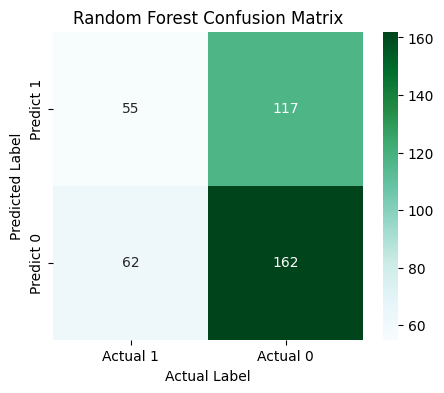

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(passholder_cm_rf, annot=True, fmt='d', cmap='BuGn',
            xticklabels=['Actual 1', 'Actual 0'],
            yticklabels=['Predict 1', 'Predict 0'])
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

#### What is your model’ s accuracy rate?

In [ ]:
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Random Forest Accuracy Rate: {accuracy_rf:.3f}")

Random Forest Accuracy Rate: 0.548


#### What is your model’s sensitivity rate?

In [ ]:
sensitivity_rf = recall_score(y_test_rf, y_pred_rf)
print(f"Random Forest Sensitivity Rate: {sensitivity_rf:.3f}")

Random Forest Sensitivity Rate: 0.723


#### What is your model’s specificity rate?

In [ ]:
specificity_rf = tn / (tn + fp)
print(f"Random Forest Specificity Rate: {specificity_rf:.3f}")

Random Forest Specificity Rate: 0.320


#### What is your model’s precision?

In [ ]:
precision_rf = precision_score(y_test_rf, y_pred_rf)
print(f"Random Forest Precision: {precision_rf:.3f}")

Random Forest Precision: 0.581


#### What is your model’s balanced accuracy?

In [ ]:
balanced_accuracy_rf = balanced_accuracy_score(y_test_rf, y_pred_rf)
print(f"Random Forest Balanced Accuracy: {balanced_accuracy_rf:.3f}")

Random Forest Balanced Accuracy: 0.521


#### Compare your model’s accuracy against the training set vs. your model’s accuracy against the test set. 

In [ ]:
# Accuracy score for RF trained dataset
train_pred_rf = bestparam_rf.predict(X_train_rf)
train_acc_rf = accuracy_score(y_train_rf, train_pred)

# Accuracy score for RF tested dataset
test_pred_rf = bestparam_rf.predict(X_test_rf)
test_acc_rf = accuracy_score(y_test_rf, test_pred)

print(f"Accuracy score for Random Forest training set: {train_acc_rf:.3f}")
print(f"Accuracy score for Random Forest test set: {test_acc_rf:.3f}")

Accuracy score for Random Forest training set: 0.610
Accuracy score for Random Forest test set: 0.543


#### How different were these results?
The random forest model performed slightly better on the training data (61.0%) than on the test data (54.3%), showing a modest gap of about 6.7 percentage points. The small gap suggests the Random Forest isn’t overfitting but may have limited generalization, likely because the features don’t fully explain renewal behavior or key factors are missing from the data.

#### Use the predict() function with your model to classify the person who you invented in the previous section.

In [ ]:
# Start with a template row of zeros for then update with selected features
passholder_A = pd.DataFrame([dict.fromkeys(X_train_rf.columns, 0)])
passholder_A['Home_State_NY'] = 1
passholder_A['Preferred_Attraction_Thrill'] = 1

pred_class = bestparam_rf.predict(passholder_A)[0]
pred_prob = bestparam_rf.predict_proba(passholder_A)[0][1]
print(f"Predicted Class for Passholder A (Random Forest): {pred_class}")
print(f"Predicted Renewal Probability (Random Forest): {pred_prob:.3f}")

Predicted Class for Passholder A (Random Forest): 1
Predicted Renewal Probability (Random Forest): 0.504


#### Does the model think that the passholder will renew?
The Random Forest model predicts that Passholder A will renew (class 1) with a renewal probability of 50.4%, though this suggests a moderate likelihood of renewing their pass.

Lobster Land can use these models as practical tools to identify which passholders are more or less likely to renew, focusing on the variables that stood out in both analyses. The logistic regression pointed to factors like Home_State and Preferred_Attraction types, suggesting opportunities for local/geographical or interest-based marketing. The random forest, on the other hand, added further insights by focusing on behavioral and engagement factors: Distance_From_Park_Miles, Feedback_Score, Total_Spending_2024, and Previous_Visits as key drivers of renewal.

By combining these insights, Lobster Land can target passholders who live farther away, show lower satisfaction, or engage less often, while rewarding loyal visitors. For instance, the park could offer transportation discounts, personalized follow-ups, or loyalty perks to strengthen renewal intent and use its marketing resources more effectively.

## Part III: Tableau Dashboard
Here's the public link for my dashboard:
https://public.tableau.com/app/profile/nhat.tran5503/viz/LobsterLandKPIDashBoard2025/Dashboard1?publish=yes

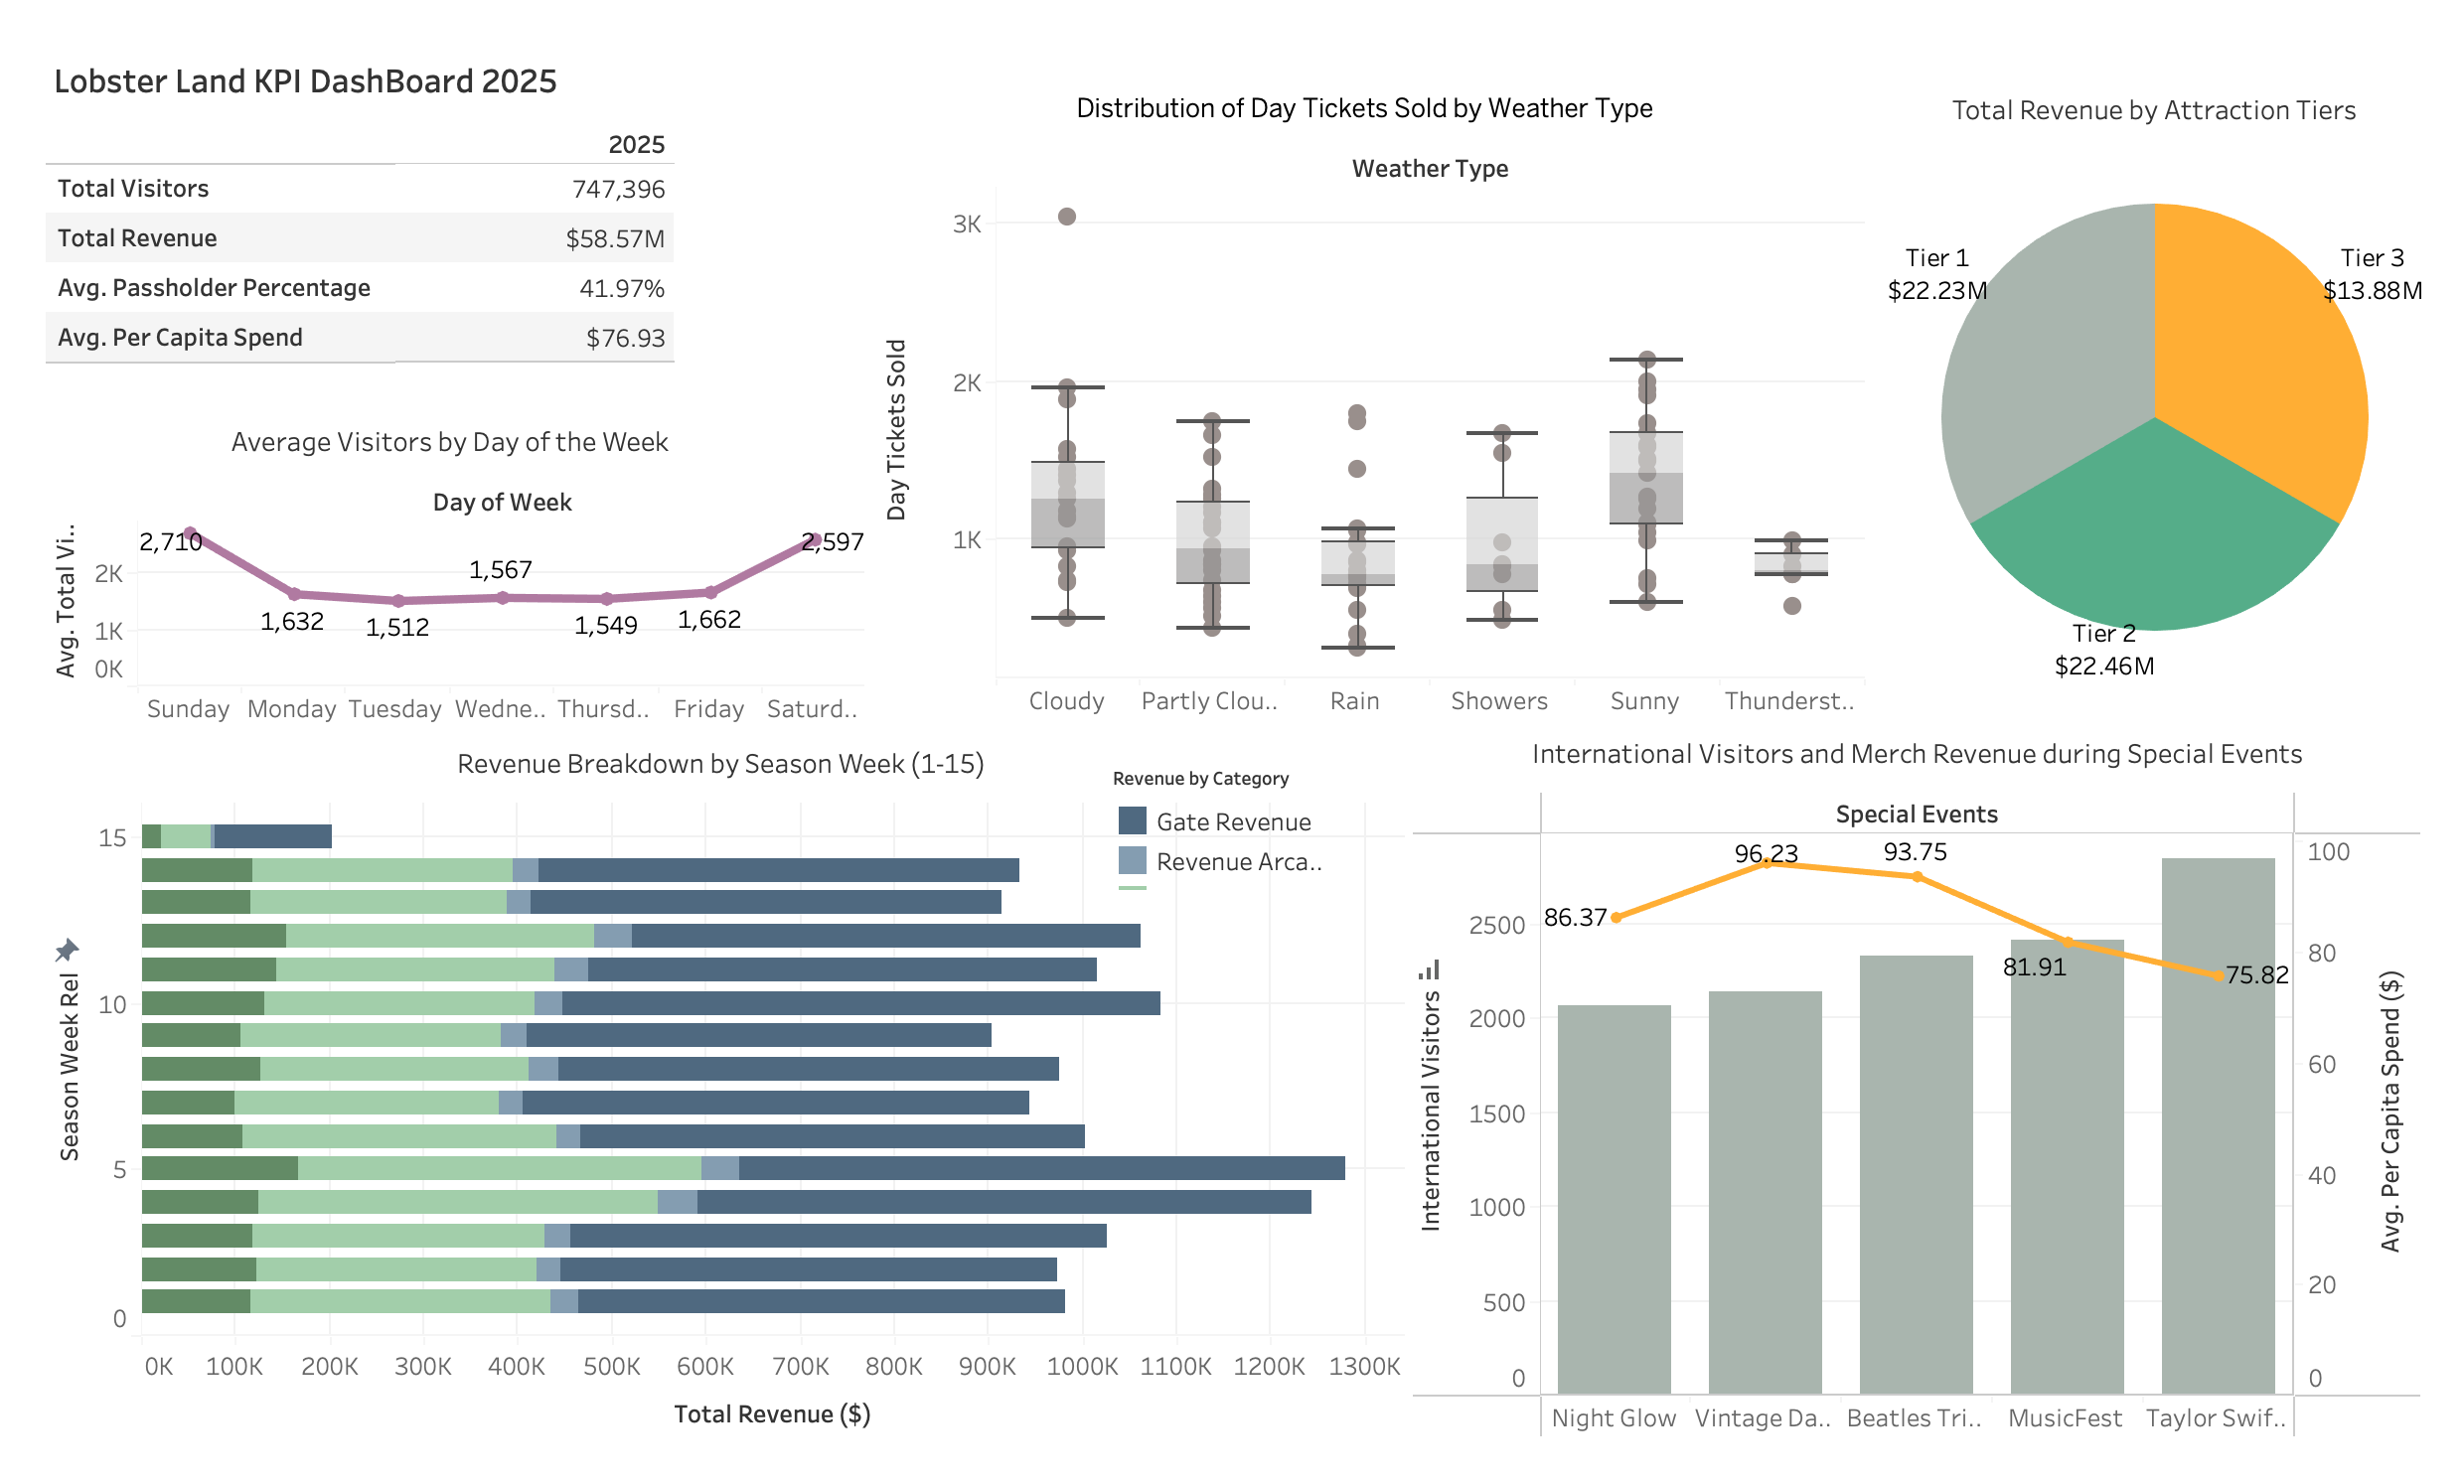

The Lobster Land KPI Dashboard reveals patterns and trends that help management understand park performance and make informed decisions. It shows which days see the most visitors, how weather impacts ticket sales, and which attractions and seasons generate the most revenue. By tracking these metrics, management can also see whether the park is meeting its KPIs, such as visitor targets, revenue goals, and event performance, and use the insights to adjust staffing, marketing, and resources as needed.

- **Average Visitors by Day of the Week (Line Chart):** This chart shows how attendance varies across the week, with weekends (Friday–Saturday) drawing the highest visitor counts. It helps identify peak days for staffing and promotions.

- **Day Tickets Sold by Weather Type (Box Plot):** The box plots compare ticket sales under different weather conditions, revealing how sunny days show the highest ticket sales, while rainy or stormy conditions lead to fewer visitors, highlighting the strong influence of weather on attendance.

- **Total Revenue by Attraction Tiers (Pie Chart):** The pie chart highlights how Tier 1 generate the largest share of revenue compared to Tier 2 and Tier 3. This emphasizes the importance of maintaining and marketing top-tier experiences.

- **Revenue Breakdown by Season (Bar Chart):** Seasonal bars show how revenue streams (food, merchandise, events) shift across seasons. Summer produces the strongest revenue across categories, especially in food and merchandise, reflecting peak tourism and vacation travel.This helps Lobster Land plan seasonal offerings and optimize resource allocation.

- **International Visitors and Merch Revenue During Special Events (Combination of Bar + Line Chart):** This chart compares per‑capita spending and merchandise revenue across major events, showing which events drive the most international engagement and sales. It helps prioritize which events to expand or replicate.